In [1]:
# import pathlib
#import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import re
#import random
#from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_auc_score
from sklearn.preprocessing import QuantileTransformer

import xgboost as xgb
from sklearn.metrics import auc, accuracy_score, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV
#from string import ascii_letters
import seaborn as sns
import h5py as h5

#from string import ascii_letters

In [2]:
def file_to_pd(filename, label):
    hdf5_file = h5.File("../h5/scalar_"+filename, "r")
    dataset = hdf5_file["vector_data"]
    df = pd.DataFrame()
    for i, name in enumerate(["met_et","jet_n","lep_n","jet_m","alljet_n"]):
        df[name] = pd.Series(np.ravel(dataset[i]))
    hdf5_file = h5.File("../h5/vector_"+filename, "r")
    dataset = hdf5_file["vector_data"]
    for n, name in enumerate(["lep_pt", "lep_eta", "lep_phi", "lep_E", "lep_charge", "lep_ptcone30", "jet_pt", "jet_eta", "jet_phi", "jet_E"]):
        for i in range(dataset.shape[2]):
            df[name+'_'+str(i)] = pd.Series(dataset[n,:,i])
    df["label"] = pd.Series(np.ones(dataset.shape[1])*label)
    return df

In [3]:
df_gg_4l  = file_to_pd("ggH_ZZ4l.h5",0)
df_VBF_4l = file_to_pd("VBFH_ZZ4l.h5",0)
df_gg_2l  = file_to_pd("ggH_WW2l2nu.h5",1)
df_VBF_2l = file_to_pd("VBFH_WW2l2nu.h5",1)
df_400    = file_to_pd("Z400.h5",2)
df_500    = file_to_pd("Z500.h5",2)
df_750    = file_to_pd("Z750.h5",2)
df_1000   = file_to_pd("Z1000.h5",2)
df_1250   = file_to_pd("Z1250.h5",2)
df = pd.concat([df_gg_4l, df_VBF_4l, df_gg_2l, df_VBF_2l, df_400,df_500, df_750, df_1000, df_1250],ignore_index=True)
df['label'] = df['label'].astype(int)
collumns = list(df)
features = list(df)[:-1]
qt = QuantileTransformer(random_state=0)
df[features] = qt.fit_transform(df[features])

In [4]:
df.head()

,met_et,jet_n,lep_n,jet_m,alljet_n,lep_pt_0,lep_pt_1,lep_pt_2,lep_pt_3,lep_pt_4,...,jet_phi_7,jet_E_0,jet_E_1,jet_E_2,jet_E_3,jet_E_4,jet_E_5,jet_E_6,jet_E_7,label
0,0.388128,0.000000,0.853854,0.089131,0.000000,0.674600,0.872171,0.824060,0.000000,0.0,...,0.5,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.086222,0.000000,0.563063,0.089131,0.000000,0.549668,0.823050,0.000000,0.000000,0.0,...,0.5,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.104972,0.412913,0.957958,0.131730,0.371872,0.457776,0.939109,0.887788,0.954611,0.0,...,0.5,0.413574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.135753,0.000000,0.957958,0.131730,0.000000,0.069844,0.739528,0.955179,0.975187,0.0,...,0.5,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.791186,0.412913,0.000000,0.912244,0.371872,0.796870,0.000000,0.000000,0.000000,0.0,...,0.5,0.779540,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [5]:
 X_train, X_test, y_train, y_test = train_test_split( df[features], df['label'], test_size=0.1, random_state=42)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84],
 [Text(0, 0, 'met_et'),
  Text(1, 0, 'lep_pt_2'),
  Text(2, 0, 'lep_pt_1'),
  Text(3, 0, 'jet_n'),
  Text(4, 0, 'jet_pt_0'),
  Text(5, 0, 'lep_E_1'),
  Text(6, 0, 'lep_phi_0'),
  Text(7, 0, 'lep_phi_1'),
  Text(8, 0, 'jet_pt_1'),
  Text(9, 0, 'lep_pt_0'),
  Text(10, 0, 'lep_E_2'),
  Text(11, 0, 'lep_eta_0'),
  Text(12, 0, 'lep_n'),
  Text(13, 0, 'lep_eta_1'),
  Text(14, 0, 'lep_ptcone30_0'),
  Text(15, 0, 'jet_m'),
  Text(16, 0, 'lep_ptcone30_1'),
  Text(17, 0, 'jet_eta_0'),
  Text(18, 0, 'lep_

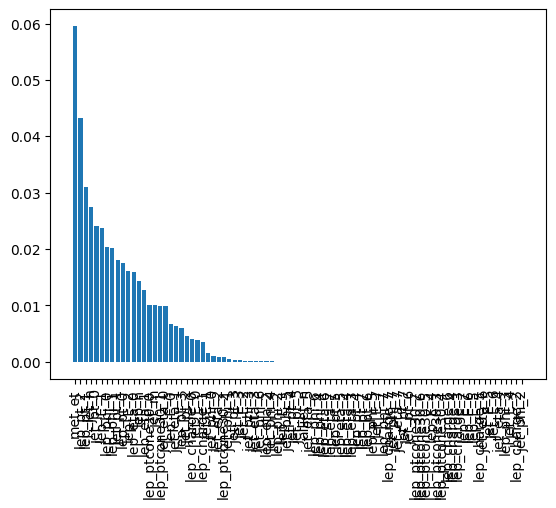

In [6]:
xgb_model = xgb.XGBClassifier()         
xgb_model.fit(X_train[features],y_train)
y_pred = xgb_model.predict(X_test[features])
acc = accuracy_score( y_test,y_pred)
perm_importance = permutation_importance(xgb_model, X_test[features], y_test).importances_mean
sort = np.argsort(perm_importance)
sorted_features = np.take_along_axis(np.array(features), sort, axis=0)[::-1]
height = perm_importance[sort][::-1]
sorted_features
plt.bar(sorted_features,height)
plt.xticks(rotation = 90)

Text(0, 0.5, 'Feature Importance')

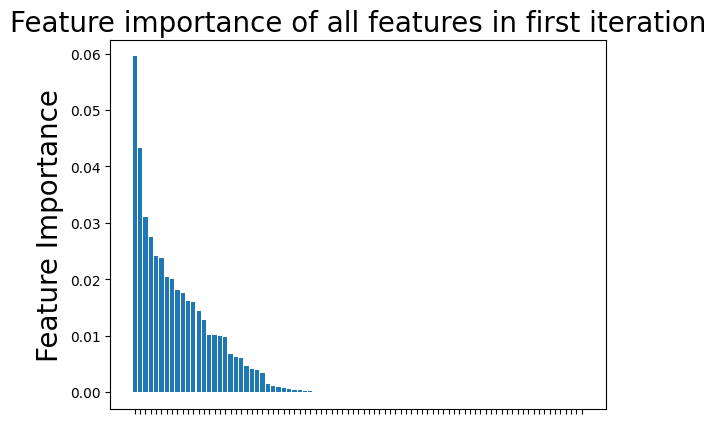

In [33]:
plt.title('Feature importance of all features in first iteration')

plt.bar(x = sorted_features,height =height)
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.xticks(rotation = 90)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    #bottom=False,      # ticks along the bottom edge are off
    #top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.ylabel('Feature Importance')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59],
 [Text(0, 0, 'met_et'),
  Text(1, 0, 'lep_pt_2'),
  Text(2, 0, 'lep_pt_1'),
  Text(3, 0, 'jet_n'),
  Text(4, 0, 'jet_pt_0'),
  Text(5, 0, 'lep_E_1'),
  Text(6, 0, 'lep_phi_0'),
  Text(7, 0, 'lep_phi_1'),
  Text(8, 0, 'jet_pt_1'),
  Text(9, 0, 'lep_pt_0'),
  Text(10, 0, 'lep_E_2'),
  Text(11, 0, 'lep_eta_0'),
  Text(12, 0, 'lep_n'),
  Text(13, 0, 'lep_eta_1'),
  Text(14, 0, 'lep_ptcone30_0'),
  Text(15, 0, 'jet_m'),
  Text(16, 0, 'lep_ptcone30_1'),
  Text(17, 0, 'jet_eta_0'),
  Text(18, 0, 'lep_E_0'),
  Text(19, 0, 'jet_eta_1'),
  Text(20, 0, 'lep_pt_3'),
  Text(21, 0, 'jet_pt_2'),
  Text(22, 0, 'lep_charge_0'),
  Text(23, 0, 'jet_E_0'),
  Te

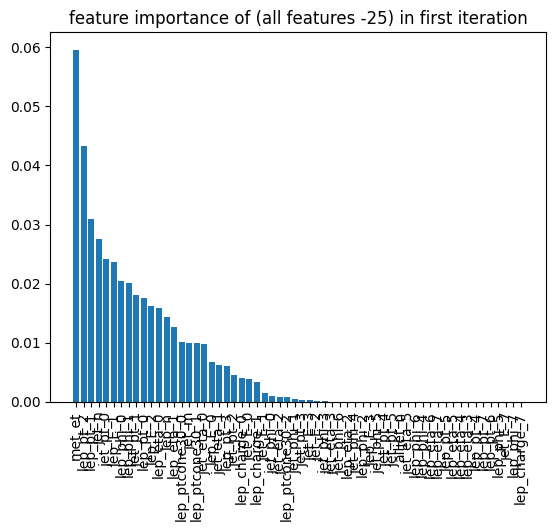

In [8]:
plt.title('feature importance of (all features -25) in first iteration')
plt.bar(sorted_features[:-25],height[:-25])
plt.xticks(rotation = 90)

In [9]:
sorted_new_1 = sorted_features[:-25]
#height_new_1 = height[:-25]

In [10]:
xgb_model = xgb.XGBClassifier()         
xgb_model.fit(X_train[sorted_new_1],y_train)
y_pred = xgb_model.predict(X_test[sorted_new_1])
acc = accuracy_score( y_test,y_pred)
perm_importance = permutation_importance(xgb_model, X_test[sorted_new_1], y_test).importances_mean
sort = np.argsort(perm_importance)
sorted_features_2 = np.take_along_axis(np.array(sorted_new_1), sort, axis=0)[::-1]
height_new_2 = perm_importance[sort][::-1]
#sorted_features
#plt.bar(sorted_features[:-30],height[:-30])
#plt.xticks(rotation = 90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59],
 [])

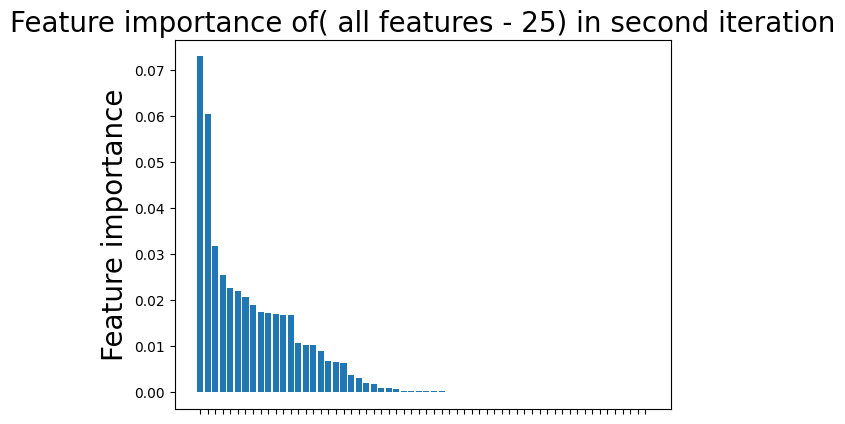

In [34]:
plt.title('Feature importance of( all features - 25) in second iteration')
plt.bar(sorted_features_2,height_new_2)
plt.ylabel("Feature importance")
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.xticks(rotation = 90)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    #bottom=False,      # ticks along the bottom edge are off
    #top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.xticks(rotation = 90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34],
 [Text(0, 0, 'lep_pt_2'),
  Text(1, 0, 'met_et'),
  Text(2, 0, 'lep_pt_1'),
  Text(3, 0, 'jet_n'),
  Text(4, 0, 'lep_E_1'),
  Text(5, 0, 'lep_eta_0'),
  Text(6, 0, 'jet_pt_0'),
  Text(7, 0, 'jet_pt_1'),
  Text(8, 0, 'lep_phi_1'),
  Text(9, 0, 'lep_eta_1'),
  Text(10, 0, 'lep_E_2'),
  Text(11, 0, 'lep_pt_0'),
  Text(12, 0, 'lep_phi_0'),
  Text(13, 0, 'lep_ptcone30_0'),
  Text(14, 0, 'lep_ptcone30_1'),
  Text(15, 0, 'jet_eta_0'),
  Text(16, 0, 'jet_m'),
  Text(17, 0, 'jet_eta_1'),
  Text(18, 0, 'lep_E_0'),
  Text(19, 0, 'lep_pt_3'),
  Text(20, 0, 'jet_E_0'),
  Text(21, 0, 'jet_pt_2'),
  Text(22, 0, 'lep_charge_1'),
  Text(23, 0, 'lep_charge_0'),
  Text(24, 0, 'jet_E_1'),
  Text(25, 0, 'lep_ptcone30_2'),
  Text(26, 0, 'jet_phi_0'),
  Text(27, 0, 'lep_eta_2'),
  Text(28, 0, 'jet_eta_2'),
  Te

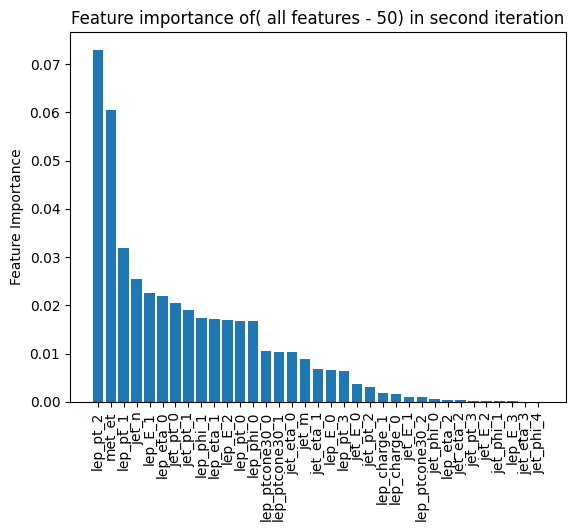

In [12]:
plt.title('Feature importance of( all features - 50) in second iteration')
plt.bar(sorted_features_2[:-25],height_new_2[:-25])
plt.ylabel('Feature Importance')
plt.xticks(rotation = 90)

In [13]:
features_new_3 = sorted_features_2[:-25]

In [14]:
xgb_model = xgb.XGBClassifier()         
xgb_model.fit(X_train[features_new_3],y_train)
y_pred = xgb_model.predict(X_test[features_new_3])
acc = accuracy_score( y_test,y_pred)
perm_importance = permutation_importance(xgb_model, X_test[features_new_3], y_test).importances_mean
sort = np.argsort(perm_importance)
sorted_features_3 = np.take_along_axis(np.array(sorted_new_1), sort, axis=0)[::-1]
height_new_3 = perm_importance[sort][::-1]

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34],
 [Text(0, 0, 'lep_pt_2'),
  Text(1, 0, 'met_et'),
  Text(2, 0, 'lep_pt_1'),
  Text(3, 0, 'jet_n'),
  Text(4, 0, 'lep_E_1'),
  Text(5, 0, 'lep_eta_0'),
  Text(6, 0, 'jet_pt_0'),
  Text(7, 0, 'jet_pt_1'),
  Text(8, 0, 'lep_phi_1'),
  Text(9, 0, 'lep_eta_1'),
  Text(10, 0, 'lep_E_2'),
  Text(11, 0, 'lep_pt_0'),
  Text(12, 0, 'lep_phi_0'),
  Text(13, 0, 'lep_ptcone30_0'),
  Text(14, 0, 'lep_ptcone30_1'),
  Text(15, 0, 'jet_eta_0'),
  Text(16, 0, 'jet_m'),
  Text(17, 0, 'jet_eta_1'),
  Text(18, 0, 'lep_E_0'),
  Text(19, 0, 'lep_pt_3'),
  Text(20, 0, 'jet_E_0'),
  Text(21, 0, 'jet_pt_2'),
  Text(22, 0, 'lep_charge_1'),
  Text(23, 0, 'lep_charge_0'),
  Text(24, 0, 'jet_E_1'),
  Text(25, 0, 'lep_ptcone30_2'),
  Text(26, 0, 'jet_phi_0'),
  Text(27, 0, 'lep_eta_2'),
  Text(28, 0, 'jet_eta_2'),
  Te

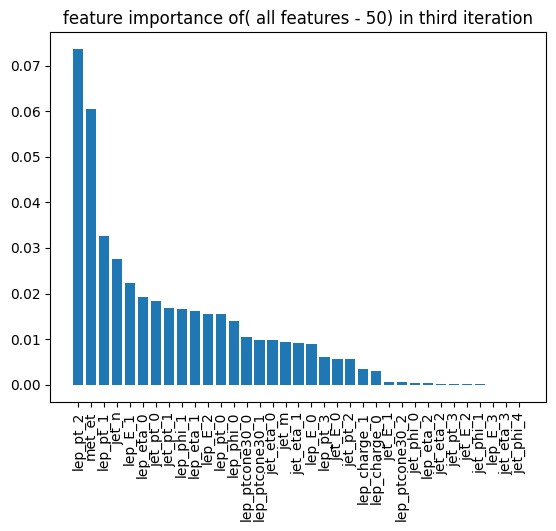

In [15]:
plt.title('feature importance of( all features - 50) in third iteration')
plt.bar(features_new_3,height_new_3)
plt.xticks(rotation = 90)

In [16]:
features_new_3[:-10]

array(['lep_pt_2', 'met_et', 'lep_pt_1', 'jet_n', 'lep_E_1', 'lep_eta_0',
       'jet_pt_0', 'jet_pt_1', 'lep_phi_1', 'lep_eta_1', 'lep_E_2',
       'lep_pt_0', 'lep_phi_0', 'lep_ptcone30_0', 'lep_ptcone30_1',
       'jet_eta_0', 'jet_m', 'jet_eta_1', 'lep_E_0', 'lep_pt_3',
       'jet_E_0', 'jet_pt_2', 'lep_charge_1', 'lep_charge_0', 'jet_E_1'],
      dtype='<U14')

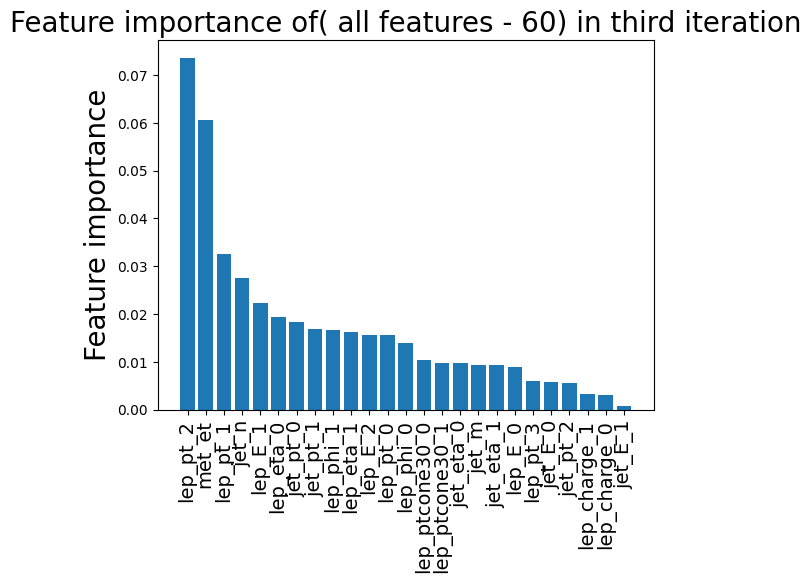

In [42]:
plt.title('Feature importance of( all features - 60) in third iteration')
plt.bar(features_new_3[:-10],height_new_3[:-10])
plt.ylabel('Feature importance')
plt.xticks(rotation = 90,fontsize=14)
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20

In [18]:
df[list(features_new_3[:-10]) + ['label']].to_pickle('../pickle_pd/second_pd_top_25.pkl')

In [19]:
list(features_new_3[:-10]).append('label')

In [20]:
test = list(features_new_3[:-10]) + ['label']
test

['lep_pt_2',
 'met_et',
 'lep_pt_1',
 'jet_n',
 'lep_E_1',
 'lep_eta_0',
 'jet_pt_0',
 'jet_pt_1',
 'lep_phi_1',
 'lep_eta_1',
 'lep_E_2',
 'lep_pt_0',
 'lep_phi_0',
 'lep_ptcone30_0',
 'lep_ptcone30_1',
 'jet_eta_0',
 'jet_m',
 'jet_eta_1',
 'lep_E_0',
 'lep_pt_3',
 'jet_E_0',
 'jet_pt_2',
 'lep_charge_1',
 'lep_charge_0',
 'jet_E_1',
 'label']

In [21]:
print(test)

['lep_pt_2', 'met_et', 'lep_pt_1', 'jet_n', 'lep_E_1', 'lep_eta_0', 'jet_pt_0', 'jet_pt_1', 'lep_phi_1', 'lep_eta_1', 'lep_E_2', 'lep_pt_0', 'lep_phi_0', 'lep_ptcone30_0', 'lep_ptcone30_1', 'jet_eta_0', 'jet_m', 'jet_eta_1', 'lep_E_0', 'lep_pt_3', 'jet_E_0', 'jet_pt_2', 'lep_charge_1', 'lep_charge_0', 'jet_E_1', 'label']


In [22]:
features_new_3[:-15]

array(['lep_pt_2', 'met_et', 'lep_pt_1', 'jet_n', 'lep_E_1', 'lep_eta_0',
       'jet_pt_0', 'jet_pt_1', 'lep_phi_1', 'lep_eta_1', 'lep_E_2',
       'lep_pt_0', 'lep_phi_0', 'lep_ptcone30_0', 'lep_ptcone30_1',
       'jet_eta_0', 'jet_m', 'jet_eta_1', 'lep_E_0', 'lep_pt_3'],
      dtype='<U14')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54],
 [Text(0, 0, 'met_et'),
  Text(1, 0, 'lep_pt_2'),
  Text(2, 0, 'lep_pt_1'),
  Text(3, 0, 'jet_n'),
  Text(4, 0, 'jet_pt_0'),
  Text(5, 0, 'lep_E_1'),
  Text(6, 0, 'lep_phi_0'),
  Text(7, 0, 'lep_phi_1'),
  Text(8, 0, 'jet_pt_1'),
  Text(9, 0, 'lep_pt_0'),
  Text(10, 0, 'lep_E_2'),
  Text(11, 0, 'lep_eta_0'),
  Text(12, 0, 'lep_n'),
  Text(13, 0, 'lep_eta_1'),
  Text(14, 0, 'lep_ptcone30_0'),
  Text(15, 0, 'jet_m'),
  Text(16, 0, 'lep_ptcone30_1'),
  Text(17, 0, 'jet_eta_0'),
  Text(18, 0, 'lep_E_0'),
  Text(19, 0, 'jet_eta_1'),
  Text(20, 0, 'lep_pt_3'),
  Text(21, 0, 'jet_pt_2'),
  Text(22, 0, 'lep_charge_0'),
  Text(23, 0, 'jet_E_0'),
  Text(24, 0, 'lep_charge_1'),
  T

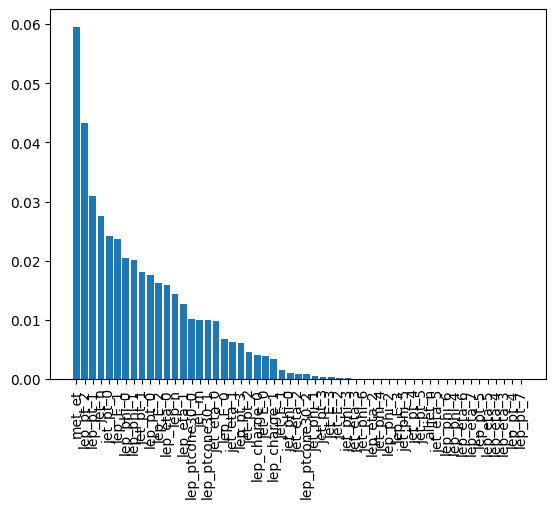

In [23]:
plt.bar(sorted_features[:-30],height[:-30])
plt.xticks(rotation = 90)

In [24]:
features = ['lep_pt_2','met_et','lep_pt_1','jet_n','lep_E_1','jet_pt_0','lep_eta_0','jet_pt_1','lep_pt_0','lep_E_2','lep_eta_1','lep_phi_1','lep_phi_0',
            'lep_ptcone30_1','lep_ptcone30_0','jet_eta_0','jet_m','lep_E_0','jet_eta_1','jet_pt_2','lep_pt_3','jet_E_0','lep_charge_1','lep_charge_0','lep_E_3']
df[features].to_pickle('../pickle_pd/pd_top_25.pkl')

In [25]:
df[features].to_pickle('../pickle_pd/pd_top_25.pkl')